<a href="https://colab.research.google.com/github/vidhibhatt04/vidhibhatt04/blob/main/Image_classification_cifar10.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [4]:
import matplotlib.pyplot as plt # for plotting
import numpy as np # for transformation

import torch # PyTorch package
import torchvision # load datasets
import torchvision.transforms as transforms # transform data
import torch.nn as nn # basic building block for neural neteorks
import torch.nn.functional as F # import convolution functions like Relu
import torch.optim as optim # optimzer 

In [5]:
transform = transforms.Compose( # composing several transforms together
    [transforms.ToTensor(), # to tensor object
     transforms.Normalize((0.5, 0.5, 0.5), (0.5, 0.5, 0.5))]) # mean = 0.5, std = 0.5


In [6]:


# set batch_size
batch_size = 4

# set number of workers
num_workers = 2


# load train data
trainset = torchvision.datasets.CIFAR10(root='./data', train=True,
                                        download=True, transform=transform)
trainloader = torch.utils.data.DataLoader(trainset, batch_size=batch_size,
                                          shuffle=True, num_workers=num_workers)

# load test data
testset = torchvision.datasets.CIFAR10(root='./data', train=False,
                                       download=True, transform=transform)
testloader = torch.utils.data.DataLoader(testset, batch_size=batch_size,
                                         shuffle=False, num_workers=num_workers)

# put 10 classes into a set
classes = ('plane', 'car', 'bird', 'cat',
           'deer', 'dog', 'frog', 'horse', 'ship', 'truck')

  0%|          | 0/170498071 [00:00<?, ?it/s]

Extracting ./data/cifar-10-python.tar.gz to ./data
Files already downloaded and verified


torch.Size([4, 3, 32, 32])
(3, 36, 138)


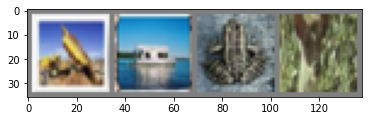

truck ship frog deer


In [7]:
def imshow(img):
  ''' function to show image '''
  img = img / 2 + 0.5 # unnormalize
  npimg = img.numpy() # convert to numpy objects
  print(npimg.shape)
  plt.imshow(np.transpose(npimg, (1, 2,0)))
  plt.show()

# get random training images with iter function
dataiter = iter(trainloader)
images, labels = dataiter.next()
print(images.shape)

# call function on our images
imshow(torchvision.utils.make_grid(images))

# print the class of the image
print(' '.join('%s' % classes[labels[j]] for j in range(batch_size)))

In [8]:
labels

tensor([9, 8, 6, 4])

In [9]:
classes

('plane',
 'car',
 'bird',
 'cat',
 'deer',
 'dog',
 'frog',
 'horse',
 'ship',
 'truck')

In [10]:
class Net(nn.Module):
    ''' Models a simple Convolutional Neural Network'''
	
    def __init__(self):
      ''' initialize the network '''
      super(Net, self).__init__()
      print("in init")
      # 3 input image channel, 6 output channels, 
      # 5x5 square convolution kernel
      self.conv1 = nn.Conv2d(3, 6, 5)
      # Max pooling over a (2, 2) window
      self.pool = nn.MaxPool2d(2, 2)
      self.conv2 = nn.Conv2d(6, 16, 5) 
      self.fc1 = nn.Linear(16 * 5 * 5, 120)# 5x5 from image dimension
      self.fc2 = nn.Linear(120, 84)
      self.fc3 = nn.Linear(84, 10)

    def forward(self, x):
      ''' the forward propagation algorithm '''
      x = self.pool(F.relu(self.conv1(x)))
      x = self.pool(F.relu(self.conv2(x)))
      x = x.view(-1, 16 * 5 * 5)
      x = F.relu(self.fc1(x))
      x = F.relu(self.fc2(x))
      x = self.fc3(x)
      return x

net = Net()
print(net)

in init
Net(
  (conv1): Conv2d(3, 6, kernel_size=(5, 5), stride=(1, 1))
  (pool): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
  (conv2): Conv2d(6, 16, kernel_size=(5, 5), stride=(1, 1))
  (fc1): Linear(in_features=400, out_features=120, bias=True)
  (fc2): Linear(in_features=120, out_features=84, bias=True)
  (fc3): Linear(in_features=84, out_features=10, bias=True)
)


In [12]:

class Net_Less_FC(nn.Module):
    ''' Models a simple Convolutional Neural Network'''
	
    def __init__(self):
      ''' initialize the network '''
      super(Net_Less_FC, self).__init__()
      print("in init")
      # 3 input image channel, 6 output channels, 
      # 5x5 square convolution kernel
      self.conv1 = nn.Conv2d(3, 6, 5)
      # Max pooling over a (2, 2) window
      self.pool = nn.MaxPool2d(2, 2)
      self.conv2 = nn.Conv2d(6, 16, 5) 
      self.fc1 = nn.Linear(16 * 5 * 5, 120)# 5x5 from image dimension
      self.fc2 = nn.Linear(120, 10)

    def forward(self, x):
      ''' the forward propagation algorithm '''
      x = self.pool(F.relu(self.conv1(x)))
      x = self.pool(F.relu(self.conv2(x)))
      x = x.view(-1, 16 * 5 * 5)
      x = F.relu(self.fc1(x))
      x = self.fc2(x)
      return x

net_less_fc = Net_Less_FC()
print(net_less_fc)

in init
Net_Less_FC(
  (conv1): Conv2d(3, 6, kernel_size=(5, 5), stride=(1, 1))
  (pool): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
  (conv2): Conv2d(6, 16, kernel_size=(5, 5), stride=(1, 1))
  (fc1): Linear(in_features=400, out_features=120, bias=True)
  (fc2): Linear(in_features=120, out_features=10, bias=True)
)


In [30]:

class Net_More_CN(nn.Module):
    ''' Models a simple Convolutional Neural Network'''
	
    def __init__(self):
      ''' initialize the network '''
      super(Net_More_CN, self).__init__()
      print("in init")
      # 3 input image channel, 6 output channels, 
      # 5x5 square convolution kernel
      self.conv1 = nn.Conv2d(3, 6, 2)
      # Max pooling over a (2, 2) window
      self.pool = nn.MaxPool2d(2, 2)
      self.conv2 = nn.Conv2d(6, 16, 2) 
      self.conv3 = nn.Conv2d(16, 32, 2) 
      self.conv4 = nn.Conv2d(32, 64, 2) 
      self.fc1 = nn.Linear(4 * 16 * 1 * 1, 800)# 5x5 from image dimension
      self.fc2 = nn.Linear(800, 400)
      self.fc3 = nn.Linear(400, 120)
      self.fc4 = nn.Linear(120, 10)

    def forward(self, x):
      ''' the forward propagation algorithm '''
      x = self.pool(F.relu(self.conv1(x)))
      # print(x.shape)
      x = self.pool(F.relu(self.conv2(x)))
      # print(x.shape)
      x = self.pool(F.relu(self.conv3(x)))
      # print(x.shape)
      x = self.pool(F.relu(self.conv4(x)))
      # print(x.shape)
      x = x.view(-1, 64 * 1 * 1)
      x = F.relu(self.fc1(x))
      x = F.relu(self.fc2(x))
      x = F.relu(self.fc3(x))
      x = self.fc4(x)
      return x

net_more_cn = Net_More_CN()
print(net_more_cn)

in init
Net_More_CN(
  (conv1): Conv2d(3, 6, kernel_size=(2, 2), stride=(1, 1))
  (pool): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
  (conv2): Conv2d(6, 16, kernel_size=(2, 2), stride=(1, 1))
  (conv3): Conv2d(16, 32, kernel_size=(2, 2), stride=(1, 1))
  (conv4): Conv2d(32, 64, kernel_size=(2, 2), stride=(1, 1))
  (fc1): Linear(in_features=64, out_features=800, bias=True)
  (fc2): Linear(in_features=800, out_features=400, bias=True)
  (fc3): Linear(in_features=400, out_features=120, bias=True)
  (fc4): Linear(in_features=120, out_features=10, bias=True)
)


In [35]:
criterion = nn.CrossEntropyLoss()
# criterion_mse = nn.MSELoss()
optimizer = optim.SGD(net.parameters(), lr=0.001, momentum=0.9)
optimizer_adam = optim.Adam(net.parameters())


In [ ]:

for epoch in range(2):  # loop over the dataset multiple times

    running_loss = 0.0
    for i, data in enumerate(trainloader, 0):
        # get the inputs; data is a list of [inputs, labels]
        inputs, labels = data

        # zero the parameter gradients
        optimizer_adam.zero_grad()
        # forward + backward + optimize
        # outputs = net(inputs)
        outputs = net_more_cn(inputs)
        loss = criterion(outputs, labels)
        loss.backward()
        optimizer_adam.step()

        # print statistics
        running_loss += loss.item()
        if i % 1000 == 999:    # print every 1000 mini-batches
            print('[%d, %5d] loss: %.3f' %
                  (epoch + 1, i + 1, running_loss / 1000))
            running_loss = 0.0


[1,  2000] loss: 2.304
[1,  4000] loss: 2.304
[1,  6000] loss: 2.304
[1,  8000] loss: 2.304


In [ ]:

dataiter = iter(testloader)
images, labels = dataiter.next()

# print images
imshow(torchvision.utils.make_grid(images))
print('GroundTruth: ', ' '.join('%s' % classes[labels[j]] for j in range(4)))

In [ ]:

outputs = net(images)
print(outputs)
_, predicted = torch.max(outputs, 1)

print('Predicted: ', ' '.join('%s' % classes[predicted[j]]
                              for j in range(4)))